In [2]:
from scipy import stats
import scikits.bootstrap as boot
import numpy as np
import scipy as sp
import math

In [3]:
col_headers = "NA1     NCL     NLN     M1      M2      TD2     TCONTACT        TISOLATE        TD1     TD0     EXB     EXN     MaxEstLhood     MaxObsLhood"
col_headers = col_headers.split()
print(col_headers)
print(len(col_headers))

['NA1', 'NCL', 'NLN', 'M1', 'M2', 'TD2', 'TCONTACT', 'TISOLATE', 'TD1', 'TD0', 'EXB', 'EXN', 'MaxEstLhood', 'MaxObsLhood']
14


In [4]:
f = "/tmp/rpt.txt"
infile = open(f, 'r')
for line in infile.read():
    line = line.strip().split()
    

dat = np.loadtxt(f)
dat_t = np.transpose(dat)

In [5]:
max_stat_dict = {}
for i in range(len(col_headers)):
    max_stat_dict[i] = []
## Get all the unique max obs lhoods
for i in set(dat_t[-1]):
#    print("Doing {}".format(i))
    curvals = [x for x in dat if x[-1] == i]
    #print(curvals)
    maxlhood = max([x[-2] for x in curvals])
    maxlhood_vals = dat[np.where(dat[:,12] == maxlhood)]
    for j, k in enumerate(maxlhood_vals[0]):
        max_stat_dict[j].append(k)
#    for j,k in enumerate(col_headers):
#        curvals = [x for x in dat[j] if dat_t[-1][j] == i]
#        print("Found curvals {} {}".format(i, curvals))
#        if curvals:
#            max_stat_dict[j].append(max(curvals))
print(max_stat_dict)

{0: [75058.0, 75528.0, 94694.0, 58850.0, 54566.0, 13262.0, 44540.0, 50295.0, 49823.0, 85882.0, 74024.0, 16972.0, 55179.0, 38652.0, 58356.0, 53481.0, 80351.0, 43291.0, 54381.0, 67125.0], 1: [60082.0, 88573.0, 18267.0, 15114.0, 116944.0, 44784.0, 7012.0, 54647.0, 16383.0, 74799.0, 16737.0, 80673.0, 47204.0, 4706.0, 13239.0, 25409.0, 73313.0, 1654.0, 5066.0, 97976.0], 2: [27707.0, 38262.0, 8537.0, 8948.0, 56967.0, 24969.0, 3429.0, 26086.0, 8104.0, 41281.0, 7779.0, 37634.0, 22614.0, 2649.0, 6766.0, 12957.0, 39452.0, 959.0, 2712.0, 46637.0], 3: [3.7215300000000003e-05, 2.5603900000000001e-05, 0.000103427, 0.000133058, 1.64779e-05, 4.2642499999999997e-05, 0.00029188100000000002, 3.4754800000000001e-05, 0.000121067, 2.6821999999999998e-05, 0.00012747999999999999, 2.4961500000000001e-05, 4.3349500000000002e-05, 0.00042629799999999998, 0.000156176, 7.8060100000000002e-05, 2.7869e-05, 0.0011942000000000001, 0.00037295200000000002, 2.1188399999999999e-05], 4: [0.0050692000000000003, 0.00191669999

# Run bootstrap CIs on just the maxlhood data

In [57]:
for i, d in enumerate(col_headers):
    n, min_max, mean, var, skew, kurt = stats.describe(max_stat_dict[i])
    std=math.sqrt(var)
    #print("\n"+d)
    print(d+"\tmin_max - {}\tmean - {}\tmedian - {}\t2std - {}".format(min_max, mean, np.median(max_stat_dict[i]), 1.96*std))
    
    results = boot.ci(max_stat_dict[i],np.average,alpha=(0.05,0.95),n_samples=20000)
    print("Bootstrapped CI w/ average - {}".format(results))
    results = boot.ci(max_stat_dict[i],np.median,alpha=(0.05),n_samples=20000)
    print("Bootstrapped CI w/ median - {}".format(results))
    results = boot.ci(max_stat_dict[i],np.mean,alpha=(0.05),n_samples=20000)
    print("Bootstrapped CI w/ mean - {}".format(results))


NA1	min_max - (13262.0, 94694.0)	mean - 57215.5	median - 54872.5	2std - 40684.0969468
Bootstrapped CI w/ average - [ 49363.55  64229.1 ]
Bootstrapped CI w/ median - [ 49823.  67125.]
Bootstrapped CI w/ mean - [ 47797.35  65412.45]
NCL	min_max - (1654.0, 116944.0)	mean - 43129.1	median - 35096.5	2std - 70032.2373616
Bootstrapped CI w/ average - [ 31235.05  57104.15]
Bootstrapped CI w/ median - [ 15114.  63980.]
Bootstrapped CI w/ mean - [ 28973.15  60199.75]
NLN	min_max - (959.0, 56967.0)	mean - 21222.45	median - 17785.5	2std - 33817.300838
Bootstrapped CI w/ average - [ 15503.55  27896.35]
Bootstrapped CI w/ median - [  7779.  31860.]
Bootstrapped CI w/ mean - [ 14425.3   29275.85]
M1	min_max - (1.64779e-05, 0.0011942000000000001)	mean - 0.000165274195	median - 6.07048e-05	2std - 0.000529257317635
Bootstrapped CI w/ average - [  9.74727350e-05   3.25376870e-04]
Bootstrapped CI w/ median - [  2.78690000e-05   1.27480000e-04]
Bootstrapped CI w/ mean - [  8.90718250e-05   3.73601445e-04]


# Run bootstrap CIs on all data

In [55]:
for i, d in enumerate(col_headers):
    n, min_max, mean, var, skew, kurt = stats.describe(dat_t[i])
    std=math.sqrt(var)
    print("\n"+d)
    #print("min_max - {}\tmean - {}\tvar - {}\tstd - {}".format(min_max, mean, var, std))
    print("min_max - {}\tmean - {}\tmedian - {}\t2std - {}".format(min_max, mean, np.median(dat_t[i]), 1.96*std))
    #print("Normal dist CI - {} - {}".format(d, stats.norm.interval(0.95, loc=mean, scale=std)))
    

    print("BCA")
    results = boot.ci(dat_t[i],np.average,alpha=(0.05,0.95),n_samples=20000)
    print("Bootstrapped CI w/ average - {}".format(results))
    results = boot.ci(dat_t[i],np.median,alpha=(0.05),n_samples=20000)
    print("Bootstrapped CI w/ median - {}".format(results))
    results = boot.ci(dat_t[i],np.mean,alpha=(0.05),n_samples=20000)
    print("Bootstrapped CI w/ mean - {}".format(results))

## Effectively the same
#    print("pi")
#    results = boot.ci(dat_t[i],np.average,alpha=(0.05,0.95),method='pi',n_samples=20000)
#    print("Bootstrapped CI w/ average - {}".format(results))
#    results = boot.ci(dat_t[i],np.median,alpha=(0.05),method='pi',n_samples=20000)
#    print("Bootstrapped CI w/ median - {}".format(results))
#    results = boot.ci(dat_t[i],np.mean,alpha=(0.05),method='pi',n_samples=20000)
#    print("Bootstrapped CI w/ mean - {}".format(results))
#    print("abc")
#    results = boot.ci(dat_t[i],np.average,alpha=(0.05,0.95),method='abc',n_samples=20000)
#    print("Bootstrapped CI w/ average - {}".format(results))
#    results = boot.ci(dat_t[i],np.median,alpha=(0.05),method='abc',n_samples=20000)
#    print("Bootstrapped CI w/ median - {}".format(results))
#    results = boot.ci(dat_t[i],np.mean,alpha=(0.05),method='abc',n_samples=20000)
#    print("Bootstrapped CI w/ mean - {}".format(results))


NA1
min_max - (13262.0, 94694.0)	mean - 50481.0588235	median - 49823.0	2std - 39562.5898741
BCA
Bootstrapped CI w/ average - [ 46857.95294118  54097.75294118]
Bootstrapped CI w/ median - [ 44558.  54381.]
Bootstrapped CI w/ mean - [ 46222.08235294  54833.01176471]

NCL
min_max - (258.0, 116944.0)	mean - 24263.1411765	median - 11612.0	2std - 59357.5785854
BCA
Bootstrapped CI w/ average - [ 19355.56470588  30217.74117647]
Bootstrapped CI w/ median - [  7012.  16383.]
Bootstrapped CI w/ mean - [ 18487.54117647  31575.05882353]

NLN
min_max - (146.0, 56967.0)	mean - 12021.5058824	median - 5757.0	2std - 29006.9487301
BCA
Bootstrapped CI w/ average - [  9646.22352941  14975.27058824]
Bootstrapped CI w/ median - [ 3419.  8094.]
Bootstrapped CI w/ mean - [  9206.83529412  15487.58823529]

M1
min_max - (1.64779e-05, 0.0080523000000000001)	mean - 0.000755687007059	median - 0.00017086	2std - 0.00254670550008
BCA
Bootstrapped CI w/ average - [ 0.0005683   0.00105067]
Bootstrapped CI w/ median - [

/usr/local/opt/anaconda/lib/python2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning:

Some values used top 10 low/high samples; results may be unstable.



Bootstrapped CI w/ median - [-10328.374 -10281.837]
Bootstrapped CI w/ mean - [-10287.884      -10246.87274118]


In [29]:
## Don't Use
## Get stats for transposed full dataset (this includes all the values
## even from the not maxlhood run)
for i, d in enumerate(col_headers):
    n, min_max, mean, var, skew, kurt = stats.describe(dat_t[i])
    std=math.sqrt(var)
    print("\n"+d)
    print("median - {}\taverage - {}".format(np.median(dat_t[i]), np.average(dat_t[i])))
    print("min_max - {}\tmean - {}\tvar - {}\tstd - {}".format(min_max, mean, var, std))
    print("CI - {} - {}".format(d, stats.norm.interval(0.95, loc=mean, scale=std)))
## Don't use


NA1
median - 49823.0	average - 50481.0588235
min_max - (13262.0, 94694.0)	mean - 50481.0588235	var - 407434016.437	std - 20184.9948337
NA1 - (10919.195921327089, 90042.921725731736)

NCL
median - 11612.0	average - 24263.1411765
min_max - (258.0, 116944.0)	mean - 24263.1411765	var - 917149660.432	std - 30284.4788701
NCL - (-35093.346699446964, 83619.629052388133)

NLN
median - 5757.0	average - 12021.5058824
min_max - (146.0, 56967.0)	mean - 12021.5058824	var - 219024123.967	std - 14799.4636378
NLN - (-16984.909838289059, 41027.921602994938)

M1
median - 0.00017086	average - 0.000755687007059
min_max - (1.64779e-05, 0.0080523000000000001)	mean - 0.000755687007059	var - 1.68828324243e-06	std - 0.00129933954086
M1 - (-0.0017909716967097248, 0.0033023457108273722)

M2
median - 0.0060471	average - 0.00631590956118
min_max - (4.29127e-05, 0.023994600000000001)	mean - 0.00631590956118	var - 1.34492495143e-05	std - 0.00366732184493
M2 - (-0.00087190917459353551, 0.013503728296946474)

TD2
medi

In [8]:
dat[0]

array([  1.97970000e+04,   4.42100000e+03,   2.68000000e+03,
         4.46502000e-04,   4.53800000e-03,   9.77800000e+04,
         9.57059300e-01,   2.96186000e-02,   2.89600000e+03,
         2.77100000e+03,  -8.52038000e-05,  -1.21692000e-03,
        -1.04236910e+04,  -1.00127180e+04])

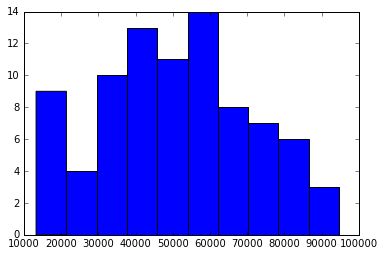

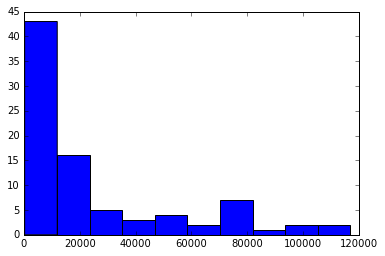

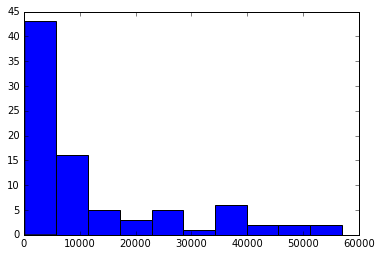

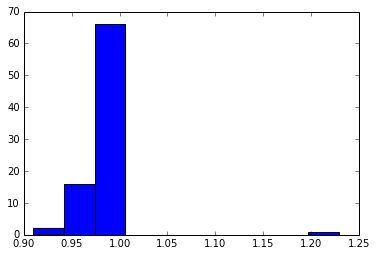

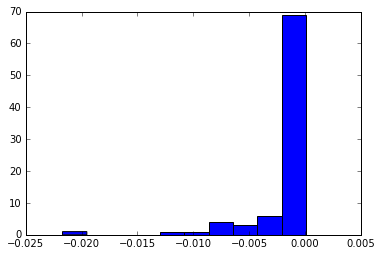

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
for i,j in enumerate(col_headers):
    if "N" in j:
        plt.hist(dat_t[i])
        plt.show()

In [20]:
a = dat
a[np.where(a[:,12] == maxlhood)]

array([[  6.71250000e+04,   9.79760000e+04,   4.66370000e+04,
          2.11884000e-05,   2.27530000e-03,   7.69200000e+04,
          9.72994700e-01,   7.11986000e-01,   5.47650000e+04,
          5.32860000e+04,  -9.15294000e-06,   1.88174000e-06,
         -1.06181040e+04,  -1.02376360e+04]])

In [12]:

print(results)

[   270.18468388  27927.16231145]


/usr/local/opt/anaconda/lib/python2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)
